In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 3.a.1 Create synthetic dataset
np.random.seed(42)
hours_studied = np.random.normal(5, 1.5, 100)
sleep_hours = np.random.normal(7, 1, 100)
exam_score = 5 * hours_studied + 2 * sleep_hours + np.random.normal(0, 5, 100)

df = pd.DataFrame({
    'hours_studied': hours_studied,
    'sleep_hours': sleep_hours,
    'exam_score': exam_score
})

# 3.a.2 Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("\nOutliers:\n", outliers.sum())

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)

Missing Values:
 hours_studied    0
sleep_hours      0
exam_score       0
dtype: int64

Outliers:
 hours_studied    1
sleep_hours      1
exam_score       2
dtype: int64


In [3]:
correlation = df[['hours_studied', 'sleep_hours']].corr()
print("Correlation Matrix:\n", correlation)

# Standardization
features = df[['hours_studied', 'sleep_hours']]
standardized_features = (features - features.mean()) / features.std()
df_standardized = pd.concat([standardized_features, df['exam_score']], axis=1)

print("\nStandardized Features Mean:\n", df_standardized.mean())
print("\nStandardized Features Std:\n", df_standardized.std())

Correlation Matrix:
                hours_studied  sleep_hours
hours_studied       1.000000    -0.136422
sleep_hours        -0.136422     1.000000

Standardized Features Mean:
 hours_studied    1.645906e-16
sleep_hours     -1.418865e-15
exam_score       3.859024e+01
dtype: float64

Standardized Features Std:
 hours_studied    1.000000
sleep_hours      1.000000
exam_score       9.445366
dtype: float64


In [4]:
def mse_loss(params, X, y):
    intercept = params[0]
    coefs = params[1:]
    preds = intercept + np.dot(X, coefs)
    return np.mean((y - preds) ** 2)

X = df[['hours_studied', 'sleep_hours']].values
y = df['exam_score'].values

initial_params = np.zeros(X.shape[1] + 1)
result = opt.minimize(mse_loss, initial_params, args=(X, y))

intercept, coef1, coef2 = result.x
print(f"Intercept: {intercept:.2f}, Coef_hours: {coef1:.2f}, Coef_sleep: {coef2:.2f}")

# Calculate R-squared
y_pred = intercept + coef1 * X[:, 0] + coef2 * X[:, 1]
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

Intercept: -2.90, Coef_hours: 5.75, Coef_sleep: 1.94
R-squared: 0.6826


In [5]:
X_sm = sm.add_constant(df[['hours_studied', 'sleep_hours']])
model = sm.OLS(df['exam_score'], X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.74e-25
Time:                        12:56:36   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             623.1
Df Residuals:                      97   BIC:                             630.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.8952      4.723     -0.613

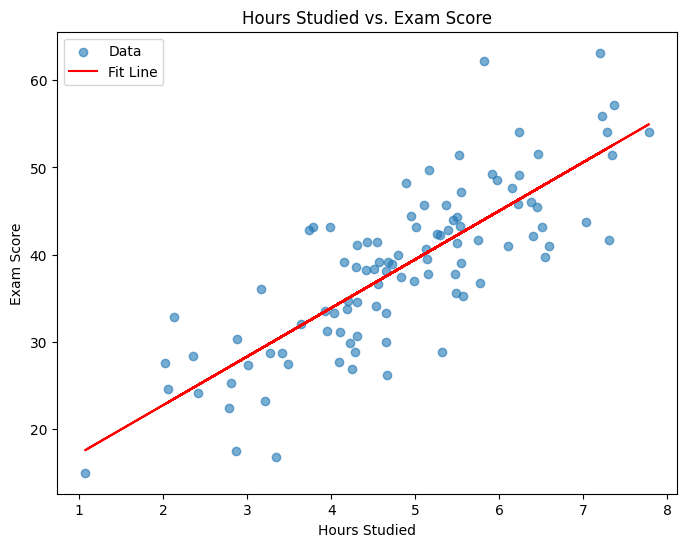

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['hours_studied'], df['exam_score'], label='Data', alpha=0.6)
m, b = np.polyfit(df['hours_studied'], df['exam_score'], 1)
plt.plot(df['hours_studied'], m * df['hours_studied'] + b, color='red', label='Fit Line')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs. Exam Score")
plt.legend()
plt.savefig("regression_plot.png")
plt.show()

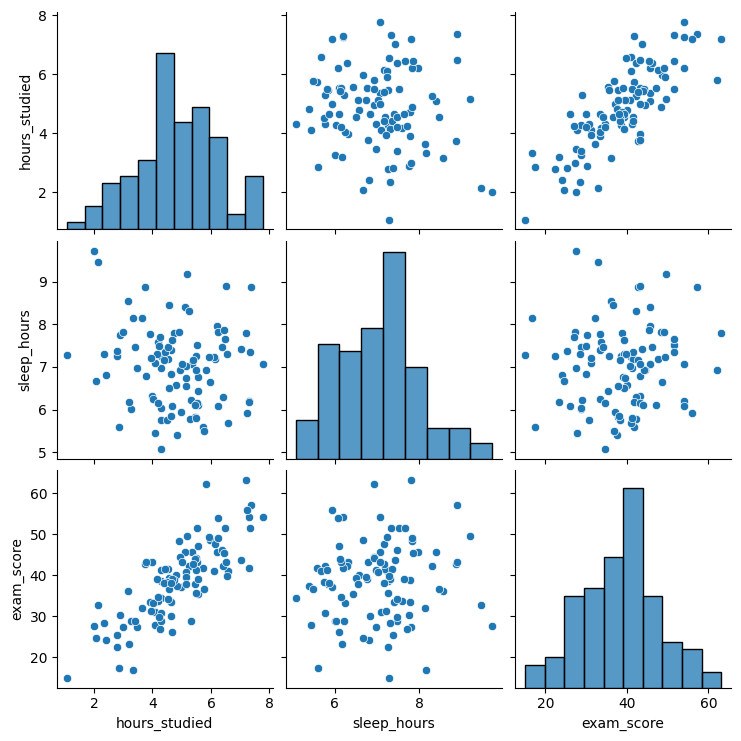

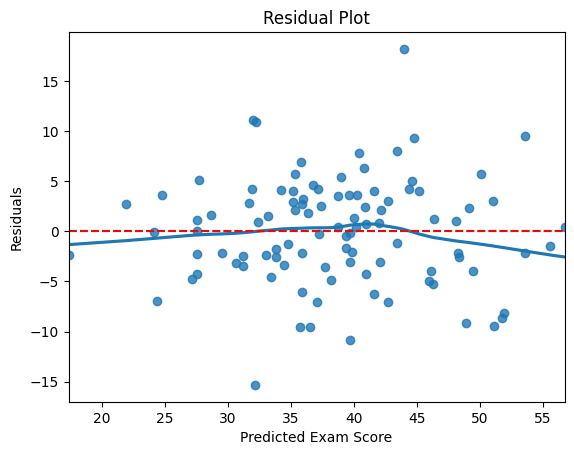

In [7]:
sns.pairplot(df)
plt.savefig("pairplot.png")
plt.show()

residuals = df['exam_score'] - model.predict(X_sm)
sns.residplot(x=model.predict(X_sm), y=residuals, lowess=True)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.savefig("residual_plot.png")
plt.show()

In [ ]:
np.random.seed(42)
hours_studied = np.random.normal(5, 1.5, 100)
sleep_hours = np.random.normal(7, 1, 100)
exam_score = 5 * hours_studied + 2 * sleep_hours + np.random.normal(0, 5, 100)

df = pd.DataFrame({
    'hours_studied': hours_studied,
    'sleep_hours': sleep_hours,
    'exam_score': exam_score
})

print("Missing Values:\n", df.isnull().sum())

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("\nOutliers:\n", outliers.sum())

df.to_csv("cleaned_data.csv", index=False)